In [24]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [25]:
pose_csv = 'Z:/KayCei/AD13-D2/VIDEOS/072523-locomotion sham/VideoOutputCamera 0-25072023-105542DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(117603, 12)


In [26]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
Z:/KayCei/AD13-D2/VIDEOS/072523-locomotion sham


### original data table

In [27]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               649.173767  569.509094   
3                                               651.029663  570.442017   
6                                               651.405396  572.591553   
9                                               649.457092  569.664124   
12                                              649.436218  572.509460   
15                                              650.755432  574.574036   
18                                              652.453613  573.235840   
21                                              651.302063  571.689636   
24                                              650.646790  571.297058   
27                                              644.121094  562.486389   
30                                              649.525452  563.304932   
33                                              650.249146  557.744507   
36                                              648.852844  563.740234   
39                                              640.912537  569.483032   
42                                              640.173950  569.023010   
45                                              650.605286  560.115784   
48                                              641.987793  563.337585   
51                                              642.336670  568.919006   
54                                              636.738525  564.710388   
57                                              638.993103  561.490906   
60                                              649.075439  559.859985   
63                                              636.187866  560.724487   
66                                              622.590637  562.580017   
69                                              607.887573  560.357239   
72                                              596.560669  563.855957   
75                                              579.733765  565.519409   
78                                              581.748718  576.042603   
81                                              598.417358  569.638245   
84                                              593.212280  558.701538   
87                                              594.783081  553.562439   
90                                              591.196655  552.211487   
93                                              582.386780  548.314575   
96                                              577.632568  547.361755   
99                                              579.643738  553.296936   
102                                             586.712891  568.801147   
105                                             591.030823  575.593872   
108                                             599.005615  558.074219   
111                                             603.794128  540.035889   
114                                             604.076965  524.719971   
117                                             612.711731  526.931152   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.996566    656.927979  565.423706   0.999988   647.933777   
3           0.630113    657.018555  569.067993   0.999430   651.017212   
6           0.366797    658.923157  571.036133   0.999967   645.173828   
9           0.994225    658.398010  565.551331   0.999997   642.316406   
12          0.230446    657.471313  565.950378   0.999413   648.615356   
15          0.999614    657.727783  570.036560   0.998917   646.214294   
18          0.164995    655.634766  567.151733   0.999950   648.790283   
21          0.096195    657.311768  567.821289   0.999884   650.530090   
24 

### after removing likelihood and headers

In [28]:
pose[:5, :]

array([[649.17376709, 569.50909424, 656.92797852, 565.42370605,
        647.93377686, 555.90582275, 693.26959229, 560.64916992,
        652.96136475, 555.48199463, 693.58843994, 525.47912598],
       [650.2454834 , 569.16772461, 658.04528809, 567.75872803,
        651.18231201, 558.54101562, 693.85778809, 560.10198975,
        652.90625   , 555.85693359, 693.01220703, 525.1048584 ],
       [650.2868042 , 572.95092773, 656.00463867, 570.05999756,
        647.85528564, 565.01293945, 694.06811523, 559.72283936,
        653.85766602, 555.21929932, 692.8727417 , 525.77197266],
       [651.02966309, 570.4420166 , 657.01855469, 569.06799316,
        651.01721191, 562.51080322, 693.30523682, 559.02990723,
        653.11999512, 554.76940918, 692.90057373, 526.99139404],
       [644.90606689, 561.9921875 , 657.36932373, 568.98522949,
        644.60302734, 552.42388916, 694.13372803, 559.50219727,
        653.8079834 , 555.50897217, 692.4375    , 527.75219727]])

### plot

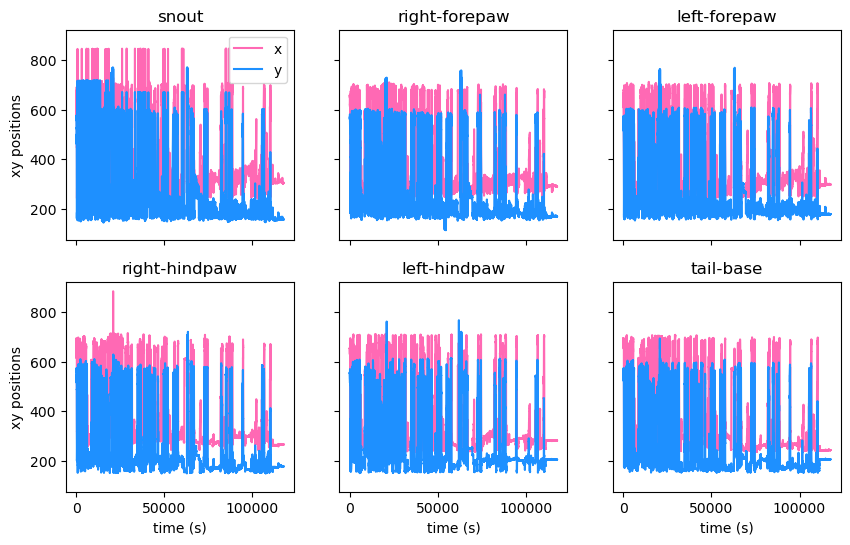

In [29]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [30]:
np.save('../processed_data/pose_video_exp_16.npy', pose)